In [2]:
# Baixar os arquivos
!curl -O http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!curl -O http://ufldl.stanford.edu/housenumbers/test_32x32.mat
!curl -O http://ufldl.stanford.edu/housenumbers/train_32x32.mat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  173M  100  173M    0     0  5696k      0  0:00:31  0:00:31 --:--:-- 2093k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 61.2M  100 61.2M    0     0  12.8M      0  0:00:04  0:00:04 --:--:-- 13.0M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  173M  100  173M    0     0  5441k      0  0:00:32  0:00:32 --:--:-- 9352k


In [71]:
import tensorflow as tf
import keras
import matplotlib
import numpy as np
import scipy.io
import numpy as np


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization, Conv2D
from tensorflow.keras import utils as np_utils
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [72]:
train_file = 'train_32x32.mat'
test_file = 'test_32x32.mat'

# Carregando os arquivos Matlab
train_data = scipy.io.loadmat(train_file) # ['__header__', '__version__', '__globals__', 'X', 'y'] - esturutra
test_data = scipy.io.loadmat(test_file) # ['__header__', '__version__', '__globals__', 'X', 'y'] - esturutra

# Coletando os X e y train e test
train_images = train_data['X']
train_labels = train_data['y']

test_images = test_data['X']
test_labels = test_data['y']

# Transposição da ordem (num_image, altura, largura, canais)
train_images = np.transpose(train_images, (3, 0, 1, 2))
test_images = np.transpose(test_images, (3, 0, 1, 2))

# Colunas para linhas nas labels
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

# Ajuste as labels para a base 0
train_labels = train_labels.flatten() - 1
test_labels = test_labels.flatten() - 1

In [73]:
#Convertendo as bases y de treinamento e teste para categorico
y_treinamento = to_categorical(train_labels, 10)
y_teste = to_categorical(test_labels, 10)

#RGB > Escalas de cinzas
train_images_rgb = train_images.astype('float32') / 255.0
test_images_rgb = test_images.astype('float32') / 255.0

train_images_gray = tf.image.rgb_to_grayscale(train_images_rgb).numpy()
test_images_gray = tf.image.rgb_to_grayscale(test_images_rgb).numpy()

**Importação das bases**

**Arquitetura do Modelo**

In [74]:
rede_neural = Sequential()

rede_neural.add(InputLayer(shape =(32, 32, 1)))

rede_neural.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size = (2, 2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(units = 128, activation = 'relu'))
rede_neural.add(Dropout(0.2))
rede_neural.add(Dense(units = 128, activation = 'relu'))
rede_neural.add(Dropout(0.2))
rede_neural.add(Dense(units = 10, activation = 'softmax'))
rede_neural.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

**Treinamento do Modelo**

In [75]:
history = rede_neural.fit(train_images_gray, y_treinamento, batch_size = 128,
                epochs = 5, validation_data = (test_images_gray, y_teste))

Epoch 1/5
573/573 ━━━━━━━━━━━━━━━━━━━━ 85s 145ms/step - accuracy: 0.5515 - loss: 1.3753 - val_accuracy: 0.7686 - val_loss: 0.9455
Epoch 2/5
573/573 ━━━━━━━━━━━━━━━━━━━━ 136s 136ms/step - accuracy: 0.8159 - loss: 0.5958 - val_accuracy: 0.8322 - val_loss: 0.5673
Epoch 3/5
573/573 ━━━━━━━━━━━━━━━━━━━━ 83s 137ms/step - accuracy: 0.8469 - loss: 0.5025 - val_accuracy: 0.8382 - val_loss: 0.5452
Epoch 4/5
573/573 ━━━━━━━━━━━━━━━━━━━━ 77s 135ms/step - accuracy: 0.8640 - loss: 0.4460 - val_accuracy: 0.8485 - val_loss: 0.5101
Epoch 5/5
573/573 ━━━━━━━━━━━━━━━━━━━━ 78s 137ms/step - accuracy: 0.8740 - loss: 0.4064 - val_accuracy: 0.8530 - val_loss: 0.4966


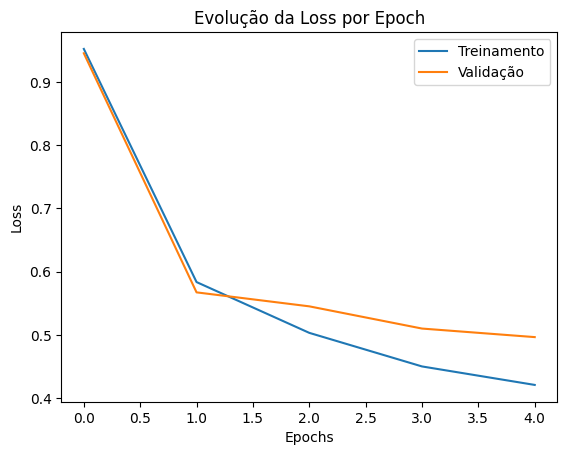

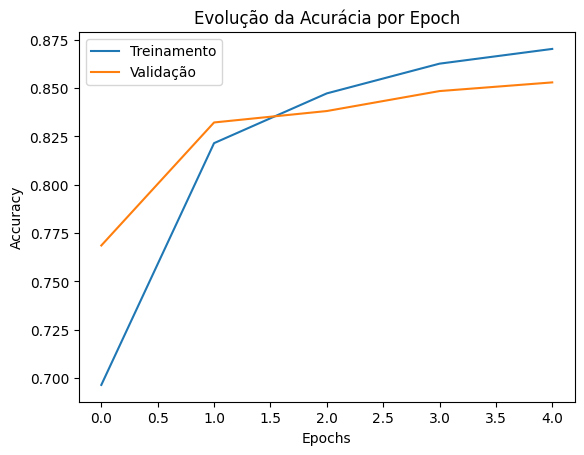

In [76]:
# --- Plotando Loss ---
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução da Loss por Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# --- Plotando Accuracy (se existir) ---
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Evolução da Acurácia por Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()